In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
# 标量的基本情况，变量名称、描述和类型
pd.read_excel("Data Dictionary.xls")

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


# 中文翻译
| 变量名称 | 描述 | 数据类型 |
|----------|------|----------|
| SeriousDlqin2yrs | 个人在过去两年内是否有90天以上的逾期记录 | 是/否 |
| RevolvingUtilizationOfUnsecuredLines | 信用卡和个人信用额度的总余额除以信用额度总和 | 百分比 |
| age | 借款人的年龄 | 整数 |
| NumberOfTime30-59DaysPastDueNotWorse | 借款人在过去两年内30-59天逾期但不超过的次数 | 整数 |
| DebtRatio | 每月债务支付、赡养费和生活费用除以每月总收入 | 百分比 |
| MonthlyIncome | 每月收入 | 实数 |
| NumberOfOpenCreditLinesAndLoans | 开放的贷款和信用额度的数量 | 整数 |
| NumberOfTimes90DaysLate | 借款人90天或以上逾期的次数 | 整数 |
| NumberRealEstateLoansOrLines | 抵押贷款和房地产贷款的数量，包括房屋净值信用额度 | 整数 |
| NumberOfTime60-89DaysPastDueNotWorse | 借款人在过去两年内60-89天逾期但不超过的次数 | 整数 |
| NumberOfDependents | 家庭中除借款人外的受抚养人数 | 整数 |


In [91]:
# 读取测试集合,去除掉第一个数据行
df = pd.read_csv("cs-training.csv").drop("Unnamed: 0", axis=1)

In [92]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

通过 info() 可以看出一共有150000条信息，MonthyIncome 和 NumberOfDependents 存在缺失的情况，MonthyIncome 缺失29731个数据，NumberOfDependents 缺失3924个数据。

下面使用 describe() 来看数据集中的计数、均值、最大最小值、标准差和第一、二、三个四分位值，同时增加了缺失率的计算

In [94]:
df.describe().T.assign(missing_rate = df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_rate
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0,0.000000
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0,0.000000
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0,0.000000
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0,0.000000
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0,0.198207
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0,0.000000
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0,0.000000
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0,0.000000
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0,0.000000


In [95]:
process_df=df.iloc[:, [5,0,1,2,3,4,6,7,8,9]]

In [96]:
process_df

,MonthlyIncome,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
0,9120.0,1,0.766127,45,2,0.802982,13,0,6,0
1,2600.0,0,0.957151,40,0,0.121876,4,0,0,0
2,3042.0,0,0.658180,38,1,0.085113,2,1,0,0
3,3300.0,0,0.233810,30,0,0.036050,5,0,0,0
4,63588.0,0,0.907239,49,1,0.024926,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...
149995,2100.0,0,0.040674,74,0,0.225131,4,0,1,0
149996,5584.0,0,0.299745,44,0,0.716562,4,0,1,0
149997,NaN,0,0.246044,58,0,3870.000000,18,0,1,0
149998,5716.0,0,0.000000,30,0,0.000000,4,0,0,0


### 缺失值处理：
    1、由于 MonthyIncome 缺失较多，因此不适合直接进行删除，这边根据变量之间存在的关系来填补缺失值，并采用随机森林的方法；
    
    2、NumberOfDependents 的缺失较少，对于整体的样本影响有限，因此这边直接进行删除操作，后续也可以进行一些其他的填补操作。

In [97]:
from sklearn.ensemble import RandomForestRegressor
# 用随机森林对缺失值预测填充函数
def set_missing(df: pd.DataFrame):   
    # 把已有的数值型特征取出来
    process_df = df.iloc[:, [5,0,1,2,3,4,6,7,8,9]]
    # 分成已知该特征和未知该特征两部分
    known = process_df[process_df.MonthlyIncome.notnull()].values
    unknown = process_df[process_df.MonthlyIncome.isnull()].values
    # X为特征属性值
    X = known[:, 1:]
    # y为结果标签值
    y = known[:, 0]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print("预测值： ", predicted)
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.MonthlyIncome.isnull()), 'MonthlyIncome'] = predicted
    return df

In [98]:
df = set_missing(df)

预测值：  [8311. 1159. 8311. ... 1159. 2554. 2554.]


In [99]:
df = df.dropna() # 删除缺失值

In [100]:
df = df.drop_duplicates() # 删除重复值

### 异常值处理：
    异常值：偏离大多数抽样数据的数值，通常指测定值中与平均值的偏差超过两倍标准差的测定值
    
    通常采用离群值检测的方法对异常值进行检测

**RevolvingUtilizationOfUnsecuredLines**

<Axes: >

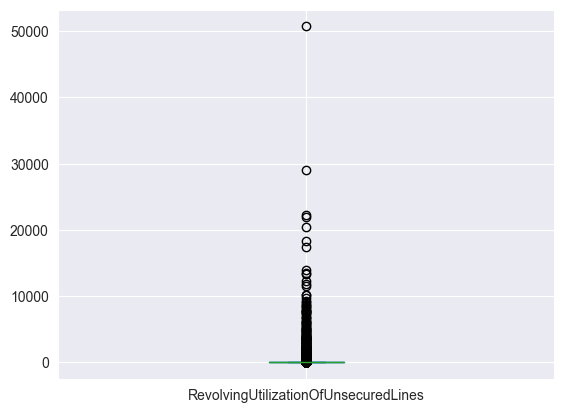

In [101]:
df["RevolvingUtilizationOfUnsecuredLines"].plot(kind="box", grid=True)

可以看出,绝大部分值都位于0-2的范围内

In [102]:
# 使用2来代替大于2的值
revNew = []
for val in df.RevolvingUtilizationOfUnsecuredLines:
    if val <= 2:
        revNew.append(val)
    else:
        revNew.append(2.)

In [103]:
df.RevolvingUtilizationOfUnsecuredLines = revNew

<Axes: >

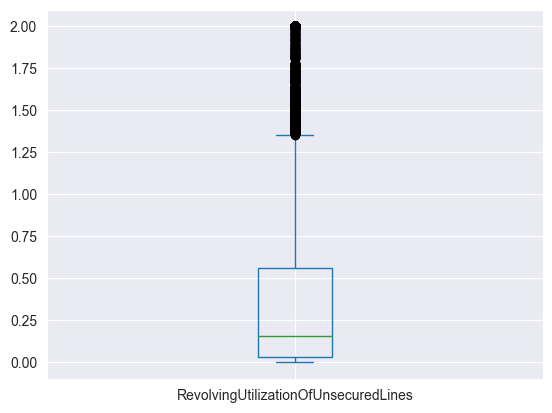

In [104]:
df["RevolvingUtilizationOfUnsecuredLines"].plot(kind="box",grid=True)

**age**

<Axes: >

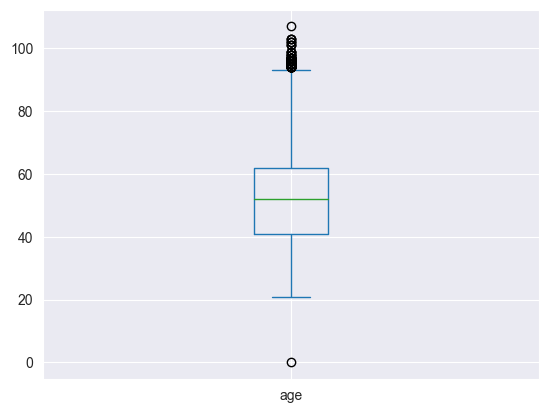

In [105]:
df.age.plot.box(grid=True)

In [106]:
df["age"] 

0         45
1         40
2         38
3         30
4         49
          ..
149995    74
149996    44
149997    58
149998    30
149999    64
Name: age, Length: 145563, dtype: int64

In [107]:
# 发现 age 属性中存在0值情况，而这些数据明显是异常值，因此对其进行处理
df = df[df["age"] > 0]

In [108]:
df['age']

0         45
1         40
2         38
3         30
4         49
          ..
149995    74
149996    44
149997    58
149998    30
149999    64
Name: age, Length: 145562, dtype: int64

**NumberOfTime30-59DaysPastDueNotWorse**

**NumberOfTime60-89DaysPastDueNotWorse**

**NumberOfTimes90DaysLate**

<Axes: >

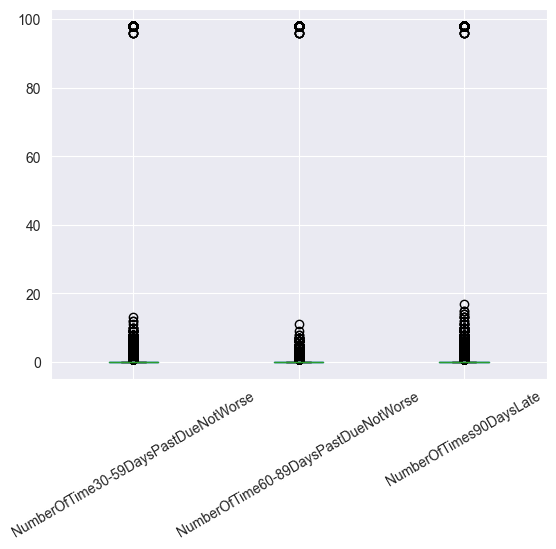

In [109]:
df.boxplot(column=["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"], 
            rot=30)

上面的箱线图可以看出 NumberOfTime30-59DaysPastDueNotWorse，NumberOfTime60-89DaysPastDueNotWorse，NumberOfTimes90DaysLate三个特征都存在两个异常值，下面使用 unique() 方法查看具体的异常值

In [110]:
print("NumberOfTime30-59DaysPastDueNotWorse:", df["NumberOfTime30-59DaysPastDueNotWorse"].unique())
print("NumberOfTime60-89DaysPastDueNotWorse:", df["NumberOfTime60-89DaysPastDueNotWorse"].unique())
print("NumberOfTimes90DaysLate:", df["NumberOfTimes90DaysLate"].unique())

NumberOfTime30-59DaysPastDueNotWorse: [ 2  0  1  3  4  5  7 10  6 98 12  8  9 96 13 11]
NumberOfTime60-89DaysPastDueNotWorse: [ 0  1  2  5  3 98  4  6  7  8 96 11  9]
NumberOfTimes90DaysLate: [ 0  1  3  2  5  4 98 10  9  6  7  8 15 96 11 13 14 17 12]


In [111]:
def replaceOutlier(data):
    New = []
    med = data.median()
    for val in data:
        if ((val == 98) | (val == 96)):
            New.append(med)
        else:
            New.append(val)
    return New

df["NumberOfTime30-59DaysPastDueNotWorse"] = replaceOutlier(df["NumberOfTime30-59DaysPastDueNotWorse"])
df["NumberOfTime60-89DaysPastDueNotWorse"] = replaceOutlier(df["NumberOfTime60-89DaysPastDueNotWorse"])
df["NumberOfTimes90DaysLate"] = replaceOutlier(df["NumberOfTimes90DaysLate"])

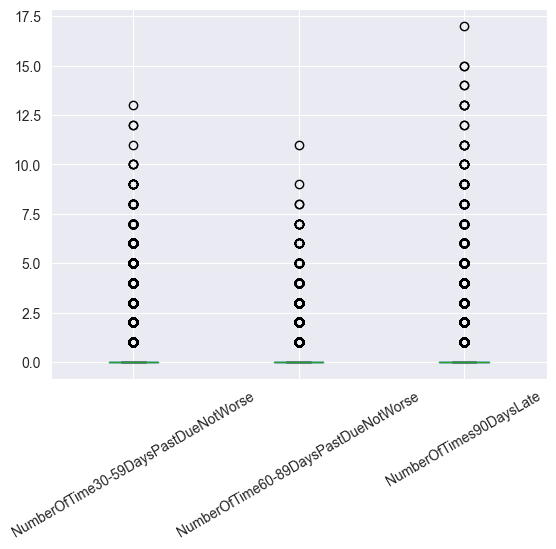

In [112]:
# 下图可以看出 NumberOfTime30-59DaysPastDueNotWorse 删除 98 和 96 两个异常值时，
# NumberOfTime60-89DaysPastDueNotWorse 和 NumberOfTimes90DaysLate 的两个异常值也同时删除了
df.boxplot(column=["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"], 
            rot=30)
plt.show()

**DebtRatio**

<Axes: >

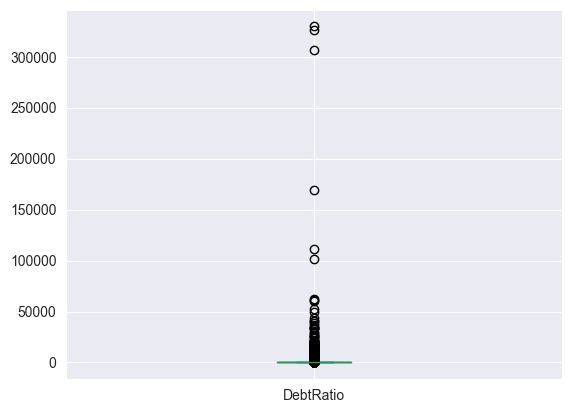

In [113]:
df["DebtRatio"].plot(kind="box")

In [114]:
# 使用中位数绝对偏差 MAD（median absolute deviation）方法进行异常值的检测
from scipy.stats import norm
# 
# def mad_based_outlier(points, thresh=3.5):
#     if type(points) is list:
#         points = np.asarray(points)
#     if len(points.shape) == 1:
#         points = points[:, None]
#     med = np.median(points, axis=0)
#     abs_dev = np.absolute(points - med)
#     med_abs_dev = np.median(abs_dev)
# 
#     mod_z_score = norm.ppf(0.75) * abs_dev / med_abs_dev
#     return mod_z_score > thresh
def mad_based_outlier(points, thresh=3.5):
    if isinstance(points, list):
        points = np.asarray(points)
    if len(points.shape) == 1:
        points = points[:, None]
    med = np.median(points, axis=0)
    abs_dev = np.absolute(points - med)
    med_abs_dev = np.median(abs_dev)

    mod_z_score = norm.ppf(0.75) * abs_dev / med_abs_dev
    return mod_z_score > thresh

In [115]:
# 检测出最小的异常值,用于替换异常值
# minUpperBound = min([val for (val, out) in zip(df.DebtRatio, mad_based_outlier(df.DebtRatio)) if out == True])
debt_ratios = df['DebtRatio'].values  # 先转换为 NumPy 数组
outliers = mad_based_outlier(debt_ratios)
minUpperBound = min([val for (val, out) in zip(debt_ratios, outliers) if out])

In [116]:
minUpperBound

1.566520924

In [117]:
newDebtRatio = []
for val in df.DebtRatio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

df.DebtRatio = newDebtRatio

In [118]:
df.DebtRatio.describe()

count    145562.000000
mean          0.571777
std           0.546250
min           0.000000
25%           0.173933
50%           0.359088
75%           0.770648
max           1.566521
Name: DebtRatio, dtype: float64

In [119]:
df.MonthlyIncome.describe()

count    1.455620e+05
mean     6.116310e+03
std      1.318226e+04
min      0.000000e+00
25%      2.554000e+03
50%      5.000000e+03
75%      8.166000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

<Axes: >

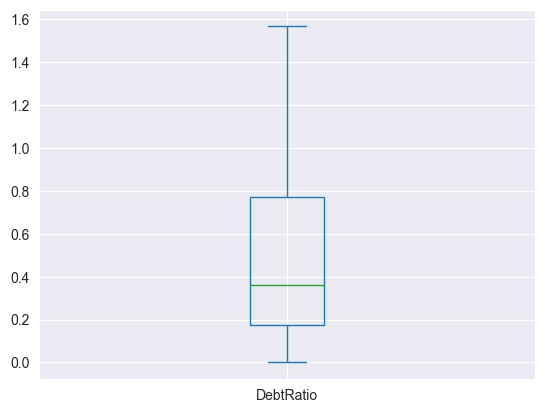

In [120]:
df["DebtRatio"].plot.box(grid=True)

**Monthly income**

<Axes: >

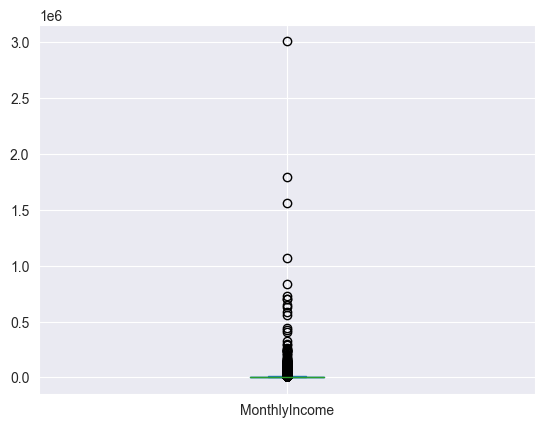

In [121]:
df.MonthlyIncome.plot.box(grid=True)

In [122]:
minUpperBound_MonthlyIncome = min([val for (val, out) in zip(df.MonthlyIncome, mad_based_outlier(df.MonthlyIncome.values)) if out == True])

In [123]:
newMonthlyIncome = []
for val in df.MonthlyIncome:
    if val > minUpperBound_MonthlyIncome:
        newMonthlyIncome.append(minUpperBound_MonthlyIncome)
    else:
        newMonthlyIncome.append(val)

df.MonthlyIncome = newMonthlyIncome

<Axes: >

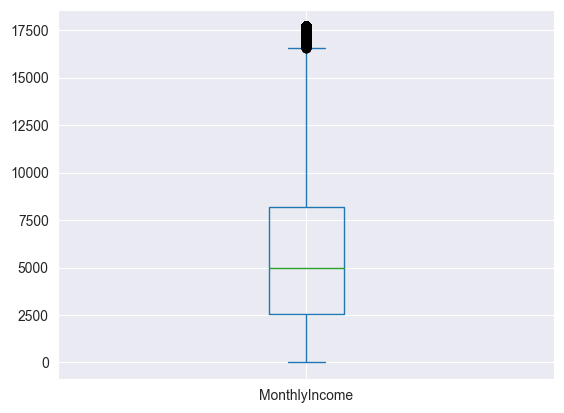

In [124]:
df.MonthlyIncome.plot.box()

**NumberOfOpenCreditLinesAndLoans**

<Axes: >

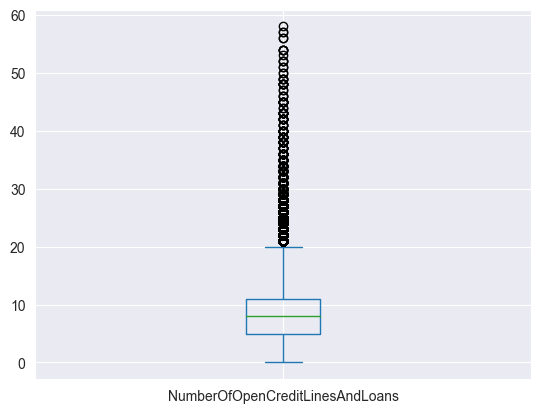

In [125]:
df["NumberOfOpenCreditLinesAndLoans"].plot(kind="box")

In [126]:
minUpperBound_NumberOfOpenCreditLinesAndLoans = min([val for (val, out) in zip(df.NumberOfOpenCreditLinesAndLoans, mad_based_outlier(df.NumberOfOpenCreditLinesAndLoans.values)) if out == True])

In [127]:
newNumberOfOpenCreditLinesAndLoans = []
for val in df.NumberOfOpenCreditLinesAndLoans:
    if val > minUpperBound_NumberOfOpenCreditLinesAndLoans:
        newNumberOfOpenCreditLinesAndLoans.append(minUpperBound_NumberOfOpenCreditLinesAndLoans)
    else:
        newNumberOfOpenCreditLinesAndLoans.append(val)

df.NumberOfOpenCreditLinesAndLoans = newNumberOfOpenCreditLinesAndLoans

In [128]:
df.NumberOfOpenCreditLinesAndLoans.describe()

count    145562.000000
mean          8.503689
std           4.936663
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          24.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

<Axes: >

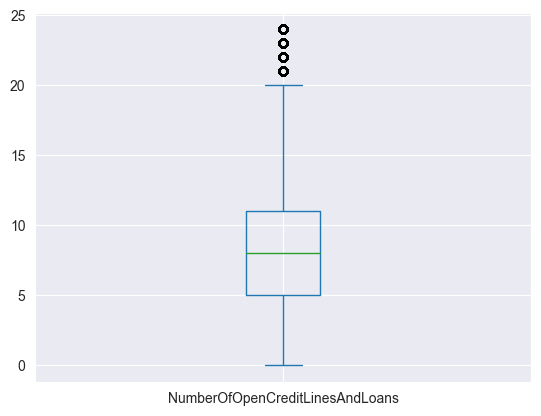

In [129]:
df["NumberOfOpenCreditLinesAndLoans"].plot(kind="box", grid=True)

**NumberRealEstateLoansOrLines**

<Axes: >

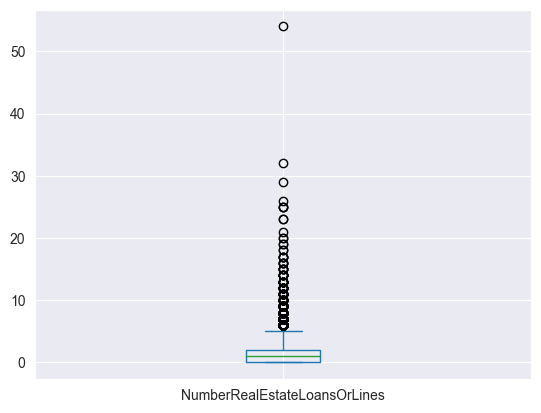

In [130]:
df["NumberRealEstateLoansOrLines"].plot(kind="box")

In [131]:
realNew = []
for val in df.NumberRealEstateLoansOrLines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)

df.NumberRealEstateLoansOrLines = realNew

<Axes: >

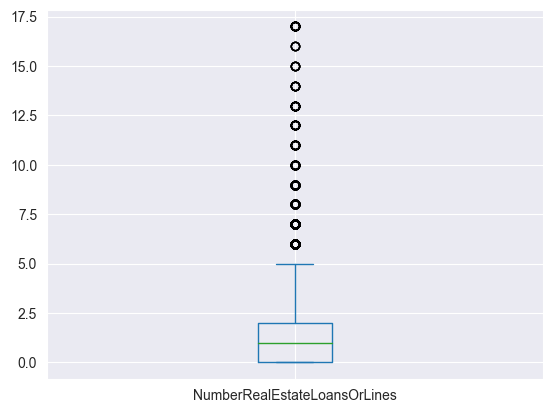

In [132]:
df["NumberRealEstateLoansOrLines"].plot(kind="box", grid=True)

<Axes: >

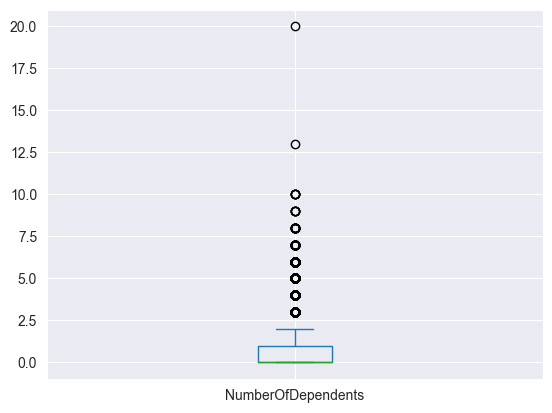

In [133]:
df.NumberOfDependents.plot.box(grid=True)

In [134]:
depNew = []
for var in df.NumberOfDependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)

df.NumberOfDependents = depNew

<Axes: >

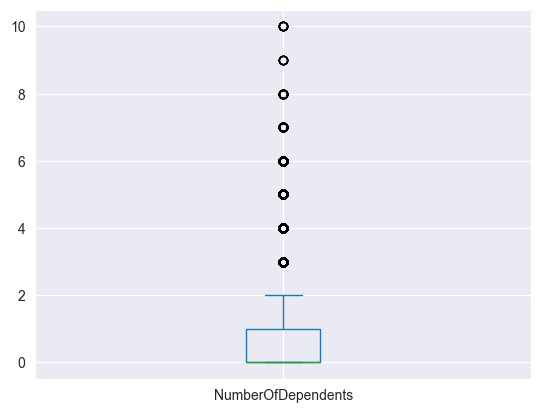

In [135]:
df.NumberOfDependents.plot.box(grid=True)

### 数据切分
    将数据进行切分，分成训练集和测试集两部分

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
Y = df["SeriousDlqin2yrs"]
X = df.iloc[:, 1:]
# 测试和训练数据进行3：7的比例进行切分 random_state定一个值是的每次运行的时候不会被随机分
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

train = pd.concat([Y_train, X_train], axis=1)
test = pd.concat([Y_test, X_test], axis=1)

train.to_csv('cs-TrainData.csv',index=False)
test.to_csv('cs-TestData.csv',index=False)

### 探索性数据分析
    一般采用直方图、散点图和箱线图等来进行分析

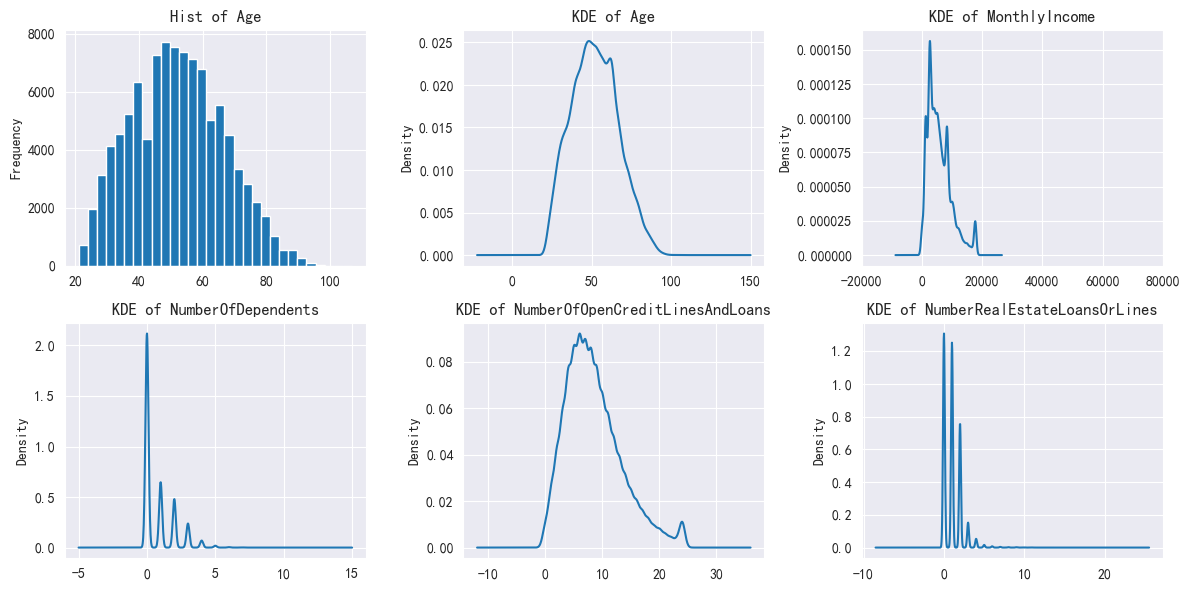

In [138]:
# 下面利用直方图和核密度估计画图，Age、MonthlyIncome、NumberOfOpenCreditLinesAndLoans大致呈正太分布，符合统计分析

fig = plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((2, 3), (0, 0))
train["age"].plot(kind="hist", bins=30, figsize=(12, 6), grid=True)
plt.title("Hist of Age")

plt.subplot2grid((2, 3), (0, 1))
train["age"].plot(kind="kde", grid=True)
plt.title("KDE of Age")

plt.subplot2grid((2, 3), (0, 2))
train["MonthlyIncome"].plot(kind="kde", grid=True)
plt.xlim(-20000, 80000)
plt.title("KDE of MonthlyIncome")

plt.subplot2grid((2, 3), (1, 0))
train["NumberOfDependents"].plot(kind="kde")
plt.title("KDE of NumberOfDependents")

plt.subplot2grid((2, 3), (1, 1))
train["NumberOfOpenCreditLinesAndLoans"].plot(kind="kde")
plt.title("KDE of NumberOfOpenCreditLinesAndLoans")

plt.subplot2grid((2, 3), (1, 2))
train["NumberRealEstateLoansOrLines"].plot(kind="kde")
plt.title("KDE of NumberRealEstateLoansOrLines")

# 解决中文的显示问题
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

plt.tight_layout() # 调整子图之间的间距，紧凑显示图像
plt.show()

### 特征选择
    变量分箱：
    
        将连续变量离散化
           
        将多状态的离散变量合并成少状态
              
    变量分箱的重要性：
    
        1、稳定性：避免特征中无意义的波动对评分带来波动
        
        2、健壮性：避免极端值的影响
        
     变量分箱的优势：
     
         1、可以将缺失值作为一个独立的箱带入模型中
         
         2、将所有的变量变换到相似的尺度上
         
     变量分箱的劣势：
     
         1、计算量大
         
         2、分箱之后需要编码
      
     变量分箱常用的方法：
     
         有监督的：
            
            1、Best-KS； 2、ChiMerge（卡方分箱法）
        
         无监督的：
            
            1、等距； 2、等频； 3、聚类

In [139]:
import scipy.stats as stats

# 自定义自动分箱函数
def mono_bin(Y, X, n=20):
    r = 0
    good = Y.sum()
    bad = Y.count() - good
    while np.abs(r) < 1:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X.rank(method="first"), n)}) # X.rank(method="first")
        d2 = d1.groupby("Bucket", as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y) # 使用斯皮尔曼等级相关系数来评估两个变量之间的相关性
        n = n - 1
    d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
    d3['min']=d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate'] / (1-d3['rate'])) / (good/bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min'))
    print(d4)
    cut=[]
    cut.append(float('-inf'))
    for i in range(1, n+1):
        qua = X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe = list(d4['woe'].round(3))
    return d4, iv, cut, woe

In [140]:
# 自定义分箱函数
def self_bin(Y, X, cat):
    good = Y.sum()
    bad = Y.count() - good
    d1 = pd.DataFrame({'X': X, 'Y': Y,'Bucket': pd.cut(X, cat)})
    d2 = d1.groupby('Bucket', as_index = True)
    d3 = pd.DataFrame(d2.X.min(), columns=['min'])
    d3['min'] = d2.min().X
    d3['max'] = d2.max().X
    d3['sum'] = d2.sum().Y
    d3['total'] = d2.count().Y
    d3['rate'] = d2.mean().Y
    d3['woe'] = np.log((d3['rate'] / (1 - d3['rate'])) / (good / bad))
    d3['goodattribute'] = d3['sum'] / good
    d3['badattribute'] = (d3['total'] - d3['sum']) / bad
    iv = ((d3['goodattribute'] - d3['badattribute']) * d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min'))
    print(d4)
    woe = list(d4['woe'].round(3))
    return d4, iv, woe

In [141]:
dfx1, ivx1, cutx1, woex1 = mono_bin(train.SeriousDlqin2yrs, train.RevolvingUtilizationOfUnsecuredLines, n=10)

                          min       max   sum  total      rate       woe  \
Bucket                                                                     
(0.999, 25474.0]     0.000000  0.031258   464  25474  0.018215 -1.370448   
(25474.0, 50947.0]   0.031260  0.158295   542  25473  0.021277 -1.211902   
(50947.0, 76420.0]   0.158306  0.560505  1323  25473  0.051937 -0.287684   
(76420.0, 101893.0]  0.560523  2.000000  4607  25473  0.180858  1.106155   

                     goodattribute  badattribute  
Bucket                                            
(0.999, 25474.0]          0.066897      0.263382  
(25474.0, 50947.0]        0.078143      0.262550  
(50947.0, 76420.0]        0.190744      0.254326  
(76420.0, 101893.0]       0.664216      0.219742  


In [142]:
pd.cut(train.RevolvingUtilizationOfUnsecuredLines,10)

61003     (-0.002, 0.2]
26974     (-0.002, 0.2]
64962     (-0.002, 0.2]
22271        (0.8, 1.0]
21614        (0.8, 1.0]
              ...      
133033       (0.2, 0.4]
123509    (-0.002, 0.2]
18246     (-0.002, 0.2]
28850        (1.6, 1.8]
16172     (-0.002, 0.2]
Name: RevolvingUtilizationOfUnsecuredLines, Length: 101893, dtype: category
Categories (10, interval[float64, right]): [(-0.002, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.8] ... (1.2, 1.4] < (1.4, 1.6] < (1.6, 1.8] < (1.8, 2.0]]

In [143]:
print(X)

        RevolvingUtilizationOfUnsecuredLines  age  \
0                                   0.766127   45   
1                                   0.957151   40   
2                                   0.658180   38   
3                                   0.233810   30   
4                                   0.907239   49   
...                                      ...  ...   
149995                              0.040674   74   
149996                              0.299745   44   
149997                              0.246044   58   
149998                              0.000000   30   
149999                              0.850283   64   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                        2.0   0.802982         9120.0   
1                                        0.0   0.121876         2600.0   
2                                        1.0   0.085113         3042.0   
3                                        0.0   0.036050         330

In [144]:
# d1 = pd.DataFrame({"X": train.RevolvingUtilizationOfUnsecuredLines, "Y": train.SeriousDlqin2yrs, "Bucket": pd.qcut(X.rank(method="first"), 10)}) 


In [145]:
# pd.qcut(X.rank(method="first"), 10)

In [146]:
dfx2, ivx2, cutx2, woex2 = mono_bin(train.SeriousDlqin2yrs, train.age, n=10)

                        min  max   sum  total      rate       woe  \
Bucket                                                              
(0.999, 11322.333]       21   33  1317  11322  0.116322  0.588970   
(11322.333, 22643.667]   33   40  1078  11321  0.095221  0.365212   
(22643.667, 33965.0]     40   45   984  11322  0.086910  0.264743   
(33965.0, 45286.333]     45   49   934  11321  0.082502  0.207865   
(45286.333, 56607.667]   49   54   839  11321  0.074110  0.091495   
(56607.667, 67929.0]     54   59   667  11322  0.058912 -0.154296   
(67929.0, 79250.333]     59   63   511  11321  0.045137 -0.435158   
(79250.333, 90571.667]   63   71   331  11321  0.029238 -0.885924   
(90571.667, 101893.0]    71  107   275  11322  0.024289 -1.076444   

                        goodattribute  badattribute  
Bucket                                               
(0.999, 11322.333]           0.189879      0.105363  
(11322.333, 22643.667]       0.155421      0.107870  
(22643.667, 33965.0]    

In [147]:
pinf = float('inf') # 正无穷大
ninf = float('-inf') # 负无穷大

In [148]:
cutx3 = [ninf, 0, 1, 3, 5, pinf]
dfx3, ivx3, woex3 = self_bin(train.SeriousDlqin2yrs, train["NumberOfTime30-59DaysPastDueNotWorse"], cutx3)

             min   max   sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]  0.0   0.0  3571  85522  0.041755 -0.516577       0.514850   
(0.0, 1.0]   1.0   1.0  1694  11086  0.152805  0.903933       0.244233   
(1.0, 3.0]   2.0   3.0  1268   4383  0.289300  1.717911       0.182814   
(3.0, 5.0]   4.0   5.0   324    744  0.435484  2.357188       0.046713   
(5.0, inf]   6.0  13.0    79    158  0.500000  2.616699       0.011390   

             badattribute  
Bucket                     
(-inf, 0.0]      0.863033  
(0.0, 1.0]       0.098908  
(1.0, 3.0]       0.032804  
(3.0, 5.0]       0.004423  
(5.0, inf]       0.000832  


In [149]:
df.DebtRatio.describe()

count    145562.000000
mean          0.571777
std           0.546250
min           0.000000
25%           0.173933
50%           0.359088
75%           0.770648
max           1.566521
Name: DebtRatio, dtype: float64

In [150]:
dfx4, ivx4, cutx4, woex4 = mono_bin(train.SeriousDlqin2yrs, train.DebtRatio, n=20)

                          min       max   sum  total      rate       woe  \
Bucket                                                                     
(0.999, 33965.0]     0.000000  0.235771  2075  33965  0.061092 -0.115632   
(33965.0, 67929.0]   0.235790  0.544337  2154  33964  0.063420 -0.075755   
(67929.0, 101893.0]  0.544357  1.566521  2707  33964  0.079702  0.170297   

                     goodattribute  badattribute  
Bucket                                            
(0.999, 33965.0]          0.299164      0.335836  
(33965.0, 67929.0]        0.310554      0.334994  
(67929.0, 101893.0]       0.390283      0.329170  


In [151]:
dfx5, ivx5, cutx5, woex5 = mono_bin(train.SeriousDlqin2yrs, train.MonthlyIncome, n=10)

                        min      max   sum  total      rate       woe  \
Bucket                                                                  
(0.999, 33965.0]        0.0   3400.0  2747  33965  0.080877  0.186213   
(33965.0, 67929.0]   3400.0   6845.0  2553  33964  0.075168  0.106810   
(67929.0, 101893.0]  6845.0  17694.0  1636  33964  0.048169 -0.366981   

                     goodattribute  badattribute  
Bucket                                            
(0.999, 33965.0]          0.396050      0.328759  
(33965.0, 67929.0]        0.368080      0.330792  
(67929.0, 101893.0]       0.235871      0.340449  


In [152]:
cutx6 = [ninf, 1, 2, 3, 5, pinf]
dfx6, ivx6, woex6 = self_bin(train.SeriousDlqin2yrs, train.NumberOfOpenCreditLinesAndLoans, cutx6)

             min  max   sum  total      rate       woe  goodattribute  \
Bucket                                                                  
(-inf, 1.0]    0    1   714   3827  0.186569  1.144240       0.102941   
(1.0, 2.0]     2    2   410   4343  0.094405  0.355698       0.059112   
(2.0, 3.0]     3    3   464   5970  0.077722  0.142990       0.066897   
(3.0, 5.0]     4    5  1111  16589  0.066972 -0.017460       0.160179   
(5.0, inf]     6   24  4237  71164  0.059539 -0.143048       0.610871   

             badattribute  
Bucket                     
(-inf, 1.0]      0.032783  
(1.0, 2.0]       0.041419  
(2.0, 3.0]       0.057984  
(3.0, 5.0]       0.163000  
(5.0, inf]       0.704814  


In [153]:
cutx7 = [ninf, 0, 1, 3, pinf]
dfx7, ivx7, woex7 = self_bin(train.SeriousDlqin2yrs, train["NumberOfTimes90DaysLate"], cutx7)

             min   max   sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]  0.0   0.0  4656  96308  0.048345 -0.363143       0.671280   
(0.0, 1.0]   1.0   1.0  1206   3608  0.334257  1.927706       0.173875   
(1.0, 3.0]   2.0   3.0   785   1542  0.509079  2.653019       0.113178   
(3.0, inf]   4.0  15.0   289    435  0.664368  3.299519       0.041667   

             badattribute  
Bucket                     
(-inf, 0.0]      0.965195  
(0.0, 1.0]       0.025296  
(1.0, 3.0]       0.007972  
(3.0, inf]       0.001538  


In [154]:
cutx8 = [ninf, 0, 1, 2, 3, pinf]
dfx8, ivx8, woex8 = self_bin(train.SeriousDlqin2yrs, train["NumberRealEstateLoansOrLines"], cutx8)

             min  max   sum  total      rate       woe  goodattribute  \
Bucket                                                                  
(-inf, 0.0]    0    0  3226  37444  0.086155  0.255190       0.465110   
(0.0, 1.0]     1    1  1863  35769  0.052084 -0.284705       0.268599   
(1.0, 2.0]     2    2  1254  21766  0.057613 -0.177973       0.180796   
(2.0, 3.0]     3    3   293   4356  0.067264 -0.012805       0.042243   
(3.0, inf]     4   17   300   2558  0.117279  0.598247       0.043253   

             badattribute  
Bucket                     
(-inf, 0.0]      0.360353  
(0.0, 1.0]       0.357067  
(1.0, 2.0]       0.216014  
(2.0, 3.0]       0.042788  
(3.0, inf]       0.023779  


In [155]:
cutx9 = [ninf, 0, 1, 3, pinf]
dfx9, ivx9, woex9 = self_bin(train.SeriousDlqin2yrs, train["NumberOfTime60-89DaysPastDueNotWorse"], cutx9)

             min   max   sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]  0.0   0.0  5107  96788  0.052765 -0.271004       0.736303   
(0.0, 1.0]   1.0   1.0  1243   4000  0.310750  1.820084       0.179210   
(1.0, 3.0]   2.0   3.0   517    994  0.520121  2.697225       0.074539   
(3.0, inf]   4.0  11.0    69    111  0.621622  3.113136       0.009948   

             badattribute  
Bucket                     
(-inf, 0.0]      0.965500  
(0.0, 1.0]       0.029034  
(1.0, 3.0]       0.005023  
(3.0, inf]       0.000442  


In [156]:
cutx10 = [ninf, 0, 1, 2, pinf]
dfx10, ivx10, woex10 = self_bin(train.SeriousDlqin2yrs, train["NumberOfDependents"], cutx10)

             min   max   sum  total      rate       woe  goodattribute  \
Bucket                                                                   
(-inf, 0.0]  0.0   0.0  3579  60340  0.059314 -0.147067       0.516003   
(0.0, 1.0]   1.0   1.0  1344  18421  0.072960  0.074617       0.193772   
(1.0, 2.0]   2.0   2.0  1125  13668  0.082309  0.205319       0.162197   
(2.0, inf]   3.0  10.0   888   9464  0.093829  0.348948       0.128028   

             badattribute  
Bucket                     
(-inf, 0.0]      0.597755  
(0.0, 1.0]       0.179839  
(1.0, 2.0]       0.132091  
(2.0, inf]       0.090315  


### 相关性分析和IV筛选

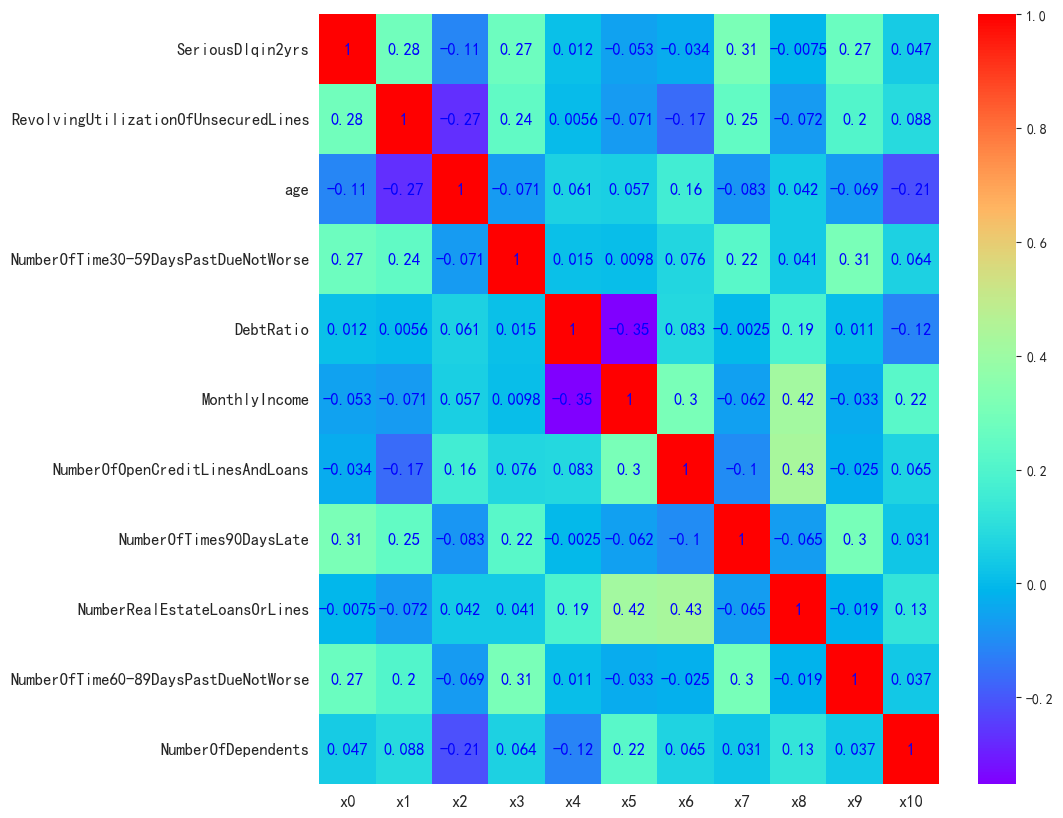

In [157]:
corr = train.corr() # 计算各变量的相关性系数
xticks = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10'] # x轴标签
yticks = list(corr.index) # y轴标签
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap='rainbow', ax=ax,
            annot_kws={'size': 12, 'weight': 'bold', 'color': 'blue'}) # 绘制相关性系数热力图
ax.set_xticklabels(xticks, rotation=0, fontsize=12)
ax.set_yticklabels(yticks, rotation=0, fontsize=12)
plt.show()

### 上图可以看出变量之间的相关性都较小，但是 NumberOfOpenCreditLinesAndLoans 和 NumberRealEstateLoansOrLines 相对来说较大为0.43

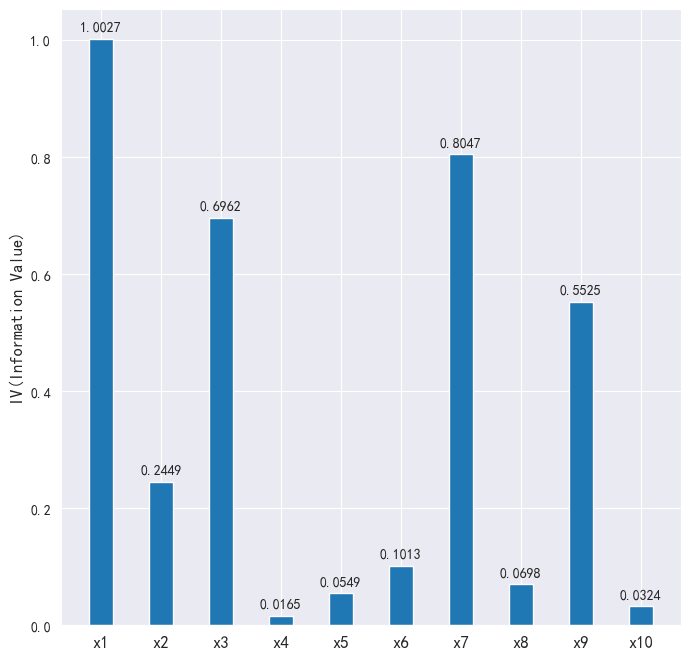

In [158]:
ivlist = [ivx1, ivx2, ivx3, ivx4, ivx5, ivx6, ivx7, ivx8, ivx9, ivx10] # 各变量IV
index = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10'] # x轴的标签
fig1 = plt.figure(figsize=(8, 8))
ax1 = fig1.add_subplot(1, 1, 1)
x = np.arange(len(index)) + 1
ax1.bar(x, ivlist, width=0.4) # 生成柱状图
ax1.set_xticks(x)
ax1.set_xticklabels(index, rotation=0, fontsize=12)
ax1.set_ylabel('IV(Information Value)', fontsize=12)
# 在柱状图上添加数字标签
for a, b in zip(x, ivlist):
    plt.text(a, b + 0.01, '%.4f' % b, ha='center', va='bottom', fontsize=10)
plt.show()

通过IV值判断变量预测能力的标准是：

**< 0.02: unpredictive**

**0.02 to 0.1: weak**

**0.1 to 0.3: medium**

**0.3 to 0.5: strong**

**> 0.5: suspicious**

DebtRatio、MonthlyIncome、NumberRealEstateLoansOrLines 和 NumberOfDependents 变量的IV值明显较低

### 模型分析
    WOE转换:
        证据权重（Weight of Evidence,WOE）转换可以将Logistic回归模型转变为标准评分卡格式

In [159]:
# 替换成woe函数
def replace_woe(series, cut, woe):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut)-2
        m = len(cut)-2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(woe[m])
        i += 1
    return list

In [160]:
from pandas import Series
train = pd.read_csv("cs-TrainData.csv")
train['RevolvingUtilizationOfUnsecuredLines'] = Series(replace_woe(train['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1))
train['age'] = Series(replace_woe(train['age'], cutx2, woex2))
train['NumberOfTime30-59DaysPastDueNotWorse'] = Series(replace_woe(train['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
train['DebtRatio'] = Series(replace_woe(train['DebtRatio'], cutx4, woex4))
train['MonthlyIncome'] = Series(replace_woe(train['MonthlyIncome'], cutx5, woex5))
train['NumberOfOpenCreditLinesAndLoans'] = Series(replace_woe(train['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
train['NumberOfTimes90DaysLate'] = Series(replace_woe(train['NumberOfTimes90DaysLate'], cutx7, woex7))
train['NumberRealEstateLoansOrLines'] = Series(replace_woe(train['NumberRealEstateLoansOrLines'], cutx8, woex8))
train['NumberOfTime60-89DaysPastDueNotWorse'] = Series(replace_woe(train['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
train['NumberOfDependents'] = Series(replace_woe(train['NumberOfDependents'], cutx10, woex10))
train.to_csv('cs-Woetrain.csv', index=False)

In [161]:
test = pd.read_csv('cs-TestData.csv')
# 替换成woe
test['RevolvingUtilizationOfUnsecuredLines'] = Series(replace_woe(test['RevolvingUtilizationOfUnsecuredLines'], cutx1, woex1))
test['age'] = Series(replace_woe(test['age'], cutx2, woex2))
test['NumberOfTime30-59DaysPastDueNotWorse'] = Series(replace_woe(test['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, woex3))
test['DebtRatio'] = Series(replace_woe(test['DebtRatio'], cutx4, woex4))
test['MonthlyIncome'] = Series(replace_woe(test['MonthlyIncome'], cutx5, woex5))
test['NumberOfOpenCreditLinesAndLoans'] = Series(replace_woe(test['NumberOfOpenCreditLinesAndLoans'], cutx6, woex6))
test['NumberOfTimes90DaysLate'] = Series(replace_woe(test['NumberOfTimes90DaysLate'], cutx7, woex7))
test['NumberRealEstateLoansOrLines'] = Series(replace_woe(test['NumberRealEstateLoansOrLines'], cutx8, woex8))
test['NumberOfTime60-89DaysPastDueNotWorse'] = Series(replace_woe(test['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, woex9))
test['NumberOfDependents'] = Series(replace_woe(test['NumberOfDependents'], cutx10, woex10))
test.to_csv('cs-TestWoeData.csv', index=False)

### 模型预测

In [162]:
from sklearn.model_selection import cross_val_score

def cvDictGen(functions, scr, X_train, Y_train, cv=10, verbose=1):
    cvDict = {}
    for func in functions:
        try:
            # 确保在使用分类得分，而非基于概率的roc_auc
            cvScore = cross_val_score(func, X_train, Y_train, cv=cv, verbose=verbose, scoring=scr)
            cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
        except Exception as e:
            print(f"Error with model {str(func).split('(')[0]}: {e}")
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[list(cvDict.keys())[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[list(cvDict.keys())[0]][1]))]
    return cvDictNormalized

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [164]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=3,
                             metric='minkowski', metric_params=None)

In [165]:
lrMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight="balanced", random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [166]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

In [167]:
gbMod = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [168]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=20, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0)

In [169]:
print(X_train.isnull().sum())
print(Y_train.isnull().sum())
print(X_train.nunique())
print(Y_train.value_counts())
print(set(Y_train))

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64
0
RevolvingUtilizationOfUnsecuredLines    86377
age                                        82
NumberOfTime30-59DaysPastDueNotWorse       14
DebtRatio                               75694
MonthlyIncome                           11138
NumberOfOpenCreditLinesAndLoans            25
NumberOfTimes90DaysLate                    16
NumberRealEstateLoansOrLines               18
NumberOfTime60-89DaysPastDueNotWorse       11
NumberOfDependents                         11
dtype: int64
0    94957
1     6936
Name: SeriousDlqin2yrs, dtype: int64
{0, 1}


In [170]:
cvD = cvDictGen(functions=[knMod, lrMod, adaMod, gbMod, rfMod], scr='roc_auc', X_train=X_train, Y_train=Y_train)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\Anaconda\envs\Credit_\lib\site-p

In [171]:
cvD # 采用auc

{'KNeighborsClassifier': [0.5898020481656745, 0.011487121698507567],
 'LogisticRegression': [0.8547321136236821, 0.004037666771442759],
 'AdaBoostClassifier': [0.8583319753215507, 0.004050825383307547],
 'GradientBoostingClassifier': [0.8639013462513475, 0.0035052340126425076],
 'RandomForestClassifier': [0.8062236808327949, 0.010466837182043004]}

In [ ]:
'''采用accuracy评分标准

{'KNeighborsClassifier': [0.9284445366286702, 0.0010733279828027222],
 'LogisticRegression': [0.8017234416726999, 0.0035193294166788306],
 'AdaBoostClassifier': [0.9344213828706149, 0.002211681954126096],
 'GradientBoostingClassifier': [0.9353341165032889, 0.0022466087863914973],
 'RandomForestClassifier': [0.9294357535609368, 0.0009804186898620534]}'''

In [ ]:
# 不论何种评分,排序均相同

In [172]:
cvDictNormalize(cvD)

{'KNeighborsClassifier': ['1.00', '1.00'],
 'LogisticRegression': ['1.45', '0.35'],
 'AdaBoostClassifier': ['1.46', '0.35'],
 'GradientBoostingClassifier': ['1.46', '0.31'],
 'RandomForestClassifier': ['1.37', '0.91']}

AdaBoost 、 GB 、 LR的out-of-the-bag较好

### 最优化超参数

AdaBoost模型

In [173]:
from sklearn.model_selection import RandomizedSearchCV

In [174]:
ada_param = {'n_estimators': [10,50,100,200,400],
                 'learning_rate': [0.1, 0.05]}

In [175]:
randomizedSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=ada_param, n_iter=5,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   6.7s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   6.2s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   6.3s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   6.2s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   6.3s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.6s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.6s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.6s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.6s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.6s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.05, n_estimators=10; total time=   0.6s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.05, n_estimators=10; total time=   0.5s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.05, n_estimators=10; total time=   0.5s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.05, n_estimators=10; total time=   0.5s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.05, n_estimators=10; total time=   0.6s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   6.3s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   6.1s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   6.1s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   6.2s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   6.2s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=  12.3s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=  12.4s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=  12.3s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=  12.3s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=  12.4s


E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [176]:
randomizedSearchAda.best_params_, randomizedSearchAda.best_score_

({'n_estimators': 200, 'learning_rate': 0.1}, 0.8583989054682192)

GB模型

In [177]:
gbParams = {'loss' : ['log_loss', 'exponential'],
            'n_estimators': [50,100,150,200],
            'max_depth': [1,2,3,4,5],
            'learning_rate':[0.1, 0.05,0.2]}

In [178]:
randomizedSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbParams, n_iter=10,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.1, loss=exponential, max_depth=1, n_estimators=100; total time=   5.6s
[CV] END learning_rate=0.1, loss=exponential, max_depth=1, n_estimators=100; total time=   5.2s
[CV] END learning_rate=0.1, loss=exponential, max_depth=1, n_estimators=100; total time=   5.2s
[CV] END learning_rate=0.1, loss=exponential, max_depth=1, n_estimators=100; total time=   5.2s
[CV] END learning_rate=0.1, loss=exponential, max_depth=1, n_estimators=100; total time=   5.2s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=4, n_estimators=200; total time=  38.9s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=4, n_estimators=200; total time=  39.5s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=4, n_estimators=200; total time=  39.1s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=4, n_estimators=200; total time=  40.7s
[CV] END learning_rate=0.2, loss=log_loss, max_depth=4, n_estimators=200; total time=  


### 1. **训练时间的差异**
- 训练不同参数组合的模型所花费的时间有较大差异。比如，`n_estimators=200` 和 `max_depth=3` 的组合耗时大约 28.7 秒，而较低 `n_estimators` 的组合耗时更短，像 `n_estimators=50` 时耗时约 9.5 秒。
- 对于 `max_depth=1` 和 `n_estimators=100` 的组合，训练时间显著缩短到 5 秒。
- 训练时间主要受 `max_depth` 和 `n_estimators` 影响，较深的树和较大的 `n_estimators` 都会增加模型训练时间。


### 2. **学习率的影响**
- 你尝试了 `learning_rate=0.2` 和 `learning_rate=0.1` 以及 `learning_rate=0.05`。根据学习率不同，训练时间没有显著差异，这说明对于你的数据集，学习率主要影响的是模型的更新速率，而非训练速度。

**建议：**
- 当前 `learning_rate=0.1` 和 `0.2` 表现不错，`0.05` 也有尝试，但可能对模型的收敛速度会有一定影响。可以根据交叉验证的结果判断，适当选择较为合适的学习率。

### 3. **模型类型的选择**
- 使用了不同的 `loss` 函数组合：`log_loss` 和 `exponential`。不同的损失函数的组合对模型的性能可能会有不同的影响。

**建议：**
- 根据最终结果，可以选择表现较好的损失函数并在该基础上进行进一步的参数微调。

### 4. **训练过程中的超参数值范围**
- 使用了 `n_estimators` 从 50 到 200，`max_depth` 从 1 到 4。可以看到较大的 `n_estimators`（如 150 和 200）和适中的 `max_depth`（如 3 或 4）花费的时间都较长，但这是在较深模型下的预期表现。
  
- 如果需要更快的训练过程，可以考虑：
  - 将 `max_depth` 限制在较小范围内，例如 1 到 3。
  - `n_estimators` 限制在 100~200 的范围内，这样可能足以取得不错的结果，同时不会大幅增加训练时间。

### 5. **交叉验证折数（CV）的影响**
- 输出表明使用了 5 折交叉验证（CV=5），每个参数组合都经过了多次交叉验证。这会在一定程度上延长训练时间。

**建议：**
- 如果训练时间过长，可以在调参阶段使用 3 折交叉验证（CV=3）来节省计算资源，然后在最终的模型确定阶段使用 5 折或更多折数进行评估。

### 6. **进一步的优化建议**
- `max_depth=3` 和 `learning_rate=0.2` 看起来是一个合适的参数组合。可以进一步结合模型性能（如 AUC 或其他评分）来确定是否需要微调 `n_estimators` 或其他超参数。
- 同时也可以考虑是否需要增加 `subsample` 和 `min_samples_split` 等超参数的调优，以防止模型过拟合。

### 7. **下一步操作**
- 查看 `randomizedSearchGB.best_params_` 和 `randomizedSearchGB.best_score_`，根据输出的最佳参数确定接下来的调整方向。
- 根据当前运行时间和模型表现，在最终模型训练时考虑资源分配，如是否增加计算资源或优化训练流程。

In [179]:
randomizedSearchGB.best_params_, randomizedSearchGB.best_score_

({'n_estimators': 50,
  'max_depth': 4,
  'loss': 'exponential',
  'learning_rate': 0.2},
 0.8639998946552078)

In [180]:
bestGbModFitted = randomizedSearchGB.best_estimator_.fit(X_train, Y_train)

In [181]:
bestAdaModFitted = randomizedSearchAda.best_estimator_.fit(X_train, Y_train)

E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [182]:
cvDictHPO = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc',X_train=X_train, Y_train=Y_train)

E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\Anaconda\envs\Credit_\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
E:\Anaconda\envs\Credit_\lib\site-p

In [183]:
cvDictNormalize(cvDictHPO)

{'GradientBoostingClassifier': ['1.00', '1.00'],
 'AdaBoostClassifier': ['0.99', '1.13']}

- `'GradientBoostingClassifier': ['1.00', '1.00']` 表示该模型的平均分数和标准差作为基准，归一化后为1。
- `'AdaBoostClassifier': ['0.98', '1.20']` 表示AdaBoost模型的平均得分是GradientBoosting的99%，而标准差是其113%。

In [184]:
# def plotCvRocCurve(X, y, classifier, nsplits=5):
# 
#     from sklearn.metrics import roc_curve, auc
#     from sklearn.model_selection import StratifiedKFold
#     import matplotlib.pyplot as plt
#     from scipy import interp
# 
#     cv = StratifiedKFold(n_splits=nsplits)
# 
#     mean_tpr = 0.0
#     mean_fpr = np.linspace(0, 1, 100)
#     all_tpr = []
# 
#     for i, (train, test) in enumerate(cv):
#         probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
# 
#         fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
#         mean_tpr += interp(mean_fpr, fpr, tpr)
#         mean_tpr[0] = 0.0
#         roc_auc = auc(fpr, tpr)
#         plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
# 
#     plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
# 
#     mean_tpr /= len(cv)
#     mean_tpr[-1] = 1.0
#     mean_auc = auc(mean_fpr, mean_tpr)
#     plt.plot(mean_fpr, mean_tpr, 'k--',
#              label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
# 
#     plt.xlim([-0.05, 1.05])
#     plt.ylim([-0.05, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('CV ROC curve')
#     plt.legend(loc="lower right")
#     fig = plt.gcf()
#     fig.set_size_inches(15,5)
# 
#     plt.show()
# 
# def rocZeroOne(y_true, y_predicted_porba):
# 
#     from sklearn.metrics import roc_curve
#     from scipy.spatial.distance import euclidean
# 
#     fpr, tpr, thresholds = roc_curve(y_true, y_predicted_porba[:, 1])
# 
#     best = [0, 1]
#     dist = []
#     for (x, y) in zip(fpr, tpr):
#         dist.append([euclidean([x,y], best)])
# 
#     bestPoint = [fpr[dist.index(min(dist))], tpr[dist.index(min(dist))]]
# 
#     bestCutOff1 = thresholds[list(fpr).index(bestPoint[0])]
#     bestCutOff2 = thresholds[list(tpr).index(bestPoint[1])]
# 
#     print('\n' + 'ROC曲线最佳点位置: TPR = {:0.3f}%, FPR = {:0.3f}%'.format(bestPoint[1]*100, bestPoint[0]*100))
#     print('\n' + '最佳截止点: {:0.4f}'.format(bestCutOff1))
# 
#     plt.plot(dist)
#     plt.xlabel('Index')
#     plt.ylabel('Euclidean Distance to the perfect [0,1]')
#     fig = plt.gcf()
#     fig.set_size_inches(15,5)
def plotCvRocCurve(X, y, classifier, nsplits=5):
    
    from sklearn.metrics import roc_curve, auc
    from sklearn.model_selection import StratifiedKFold
    import matplotlib.pyplot as plt
    from scipy import interp
    import numpy as np

    cv = StratifiedKFold(n_splits=nsplits)

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    for i, (train, test) in enumerate(cv.split(X, y)):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])

        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr /= nsplits
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CV ROC curve')
    plt.legend(loc="lower right")
    fig = plt.gcf()
    fig.set_size_inches(15,5)

    plt.show()

def rocZeroOne(y_true, y_predicted_proba):
    
    from sklearn.metrics import roc_curve
    from scipy.spatial.distance import euclidean
    import matplotlib.pyplot as plt

    fpr, tpr, thresholds = roc_curve(y_true, y_predicted_proba[:, 1])
    
    best = [0, 1]
    dist = []
    for (x, y) in zip(fpr, tpr):
        dist.append(euclidean([x, y], best))

    bestPoint = [fpr[dist.index(min(dist))], tpr[dist.index(min(dist))]]
    
    bestCutOff1 = thresholds[list(fpr).index(bestPoint[0])]
    bestCutOff2 = thresholds[list(tpr).index(bestPoint[1])]
    
    print('\n' + 'ROC曲线最佳点位置: TPR = {:0.3f}%, FPR = {:0.3f}%'.format(bestPoint[1]*100, bestPoint[0]*100))
    print('\n' + '最佳截止点: {:0.4f}'.format(bestCutOff1))

    plt.plot(dist)
    plt.xlabel('Index')
    plt.ylabel('Euclidean Distance to the perfect [0,1]')
    fig = plt.gcf()
    fig.set_size_inches(15,5)
    plt.show()


C:\Users\Tieti_Tage\AppData\Local\Temp\ipykernel_30700\3992956213.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Tieti_Tage\AppData\Local\Temp\ipykernel_30700\3992956213.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Tieti_Tage\AppData\Local\Temp\ipykernel_30700\3992956213.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Tieti_Tage\AppData\Local\Temp\ipykernel_30700\3992956213.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\Tieti_Tage\AppData\Local\Temp\ipykernel_30700\3992956213.py:85: DeprecationWarning: scipy.interp is dep

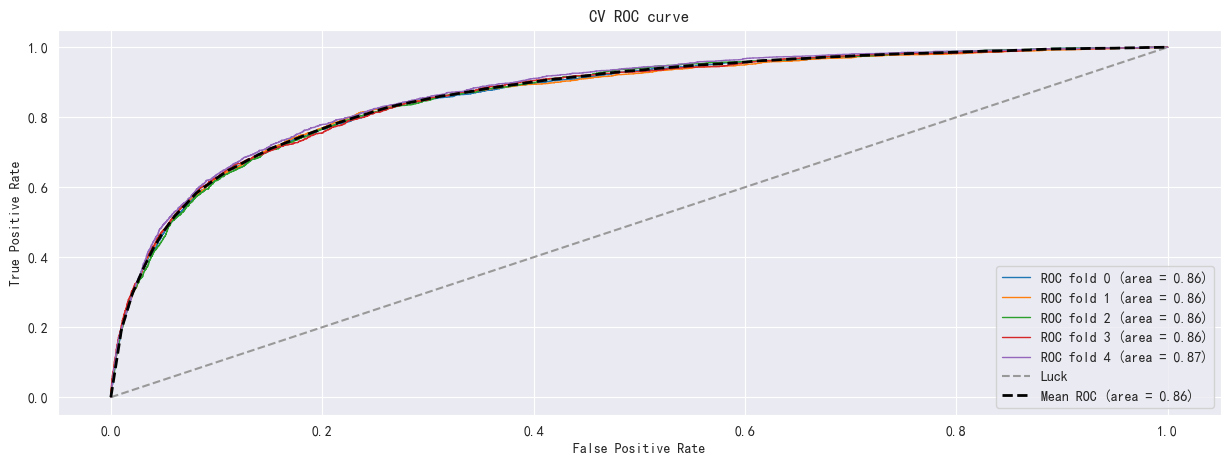

In [185]:
plotCvRocCurve(X, Y, randomizedSearchGB.best_estimator_)


ROC曲线最佳点位置: TPR = 78.135%, FPR = 20.013%

最佳截止点: 0.0668


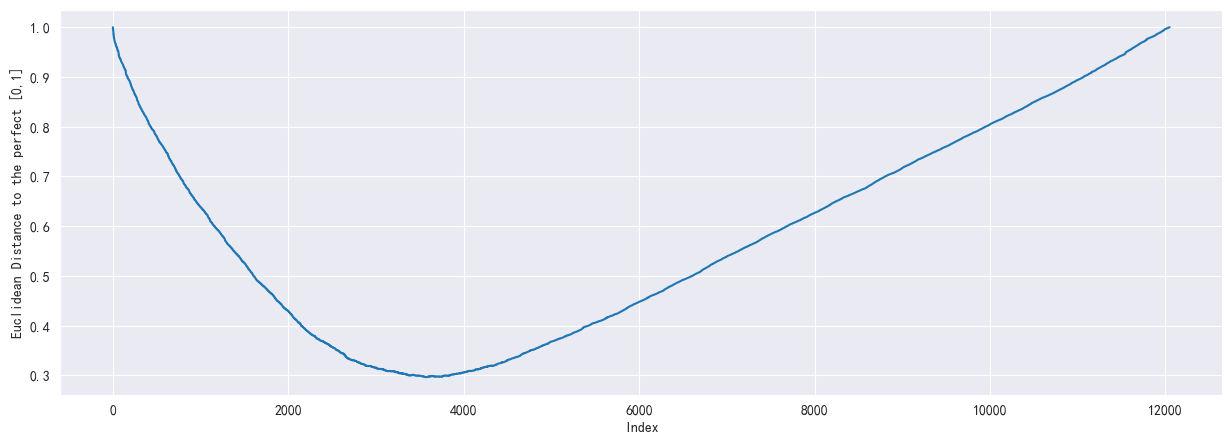

In [186]:
rocZeroOne(Y_test, randomizedSearchGB.predict_proba(X_test))

In [187]:
# from sklearn.model_selection import GridSearchCV
# 
# # 定义模型和参数网格
# model = GradientBoostingClassifier()
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1]
# }
# 
# # 使用 GridSearchCV 进行超参数调优
# gridSearchAda = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5)
# gridSearchAda.fit(X, Y)

KeyboardInterrupt: 

[LibLinear][LibLinear]

C:\Users\Tieti_Tage\AppData\Local\Temp\ipykernel_30700\3992956213.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)


[LibLinear]

C:\Users\Tieti_Tage\AppData\Local\Temp\ipykernel_30700\3992956213.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)


[LibLinear]

C:\Users\Tieti_Tage\AppData\Local\Temp\ipykernel_30700\3992956213.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)


[LibLinear]

C:\Users\Tieti_Tage\AppData\Local\Temp\ipykernel_30700\3992956213.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)


[LibLinear]

C:\Users\Tieti_Tage\AppData\Local\Temp\ipykernel_30700\3992956213.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)


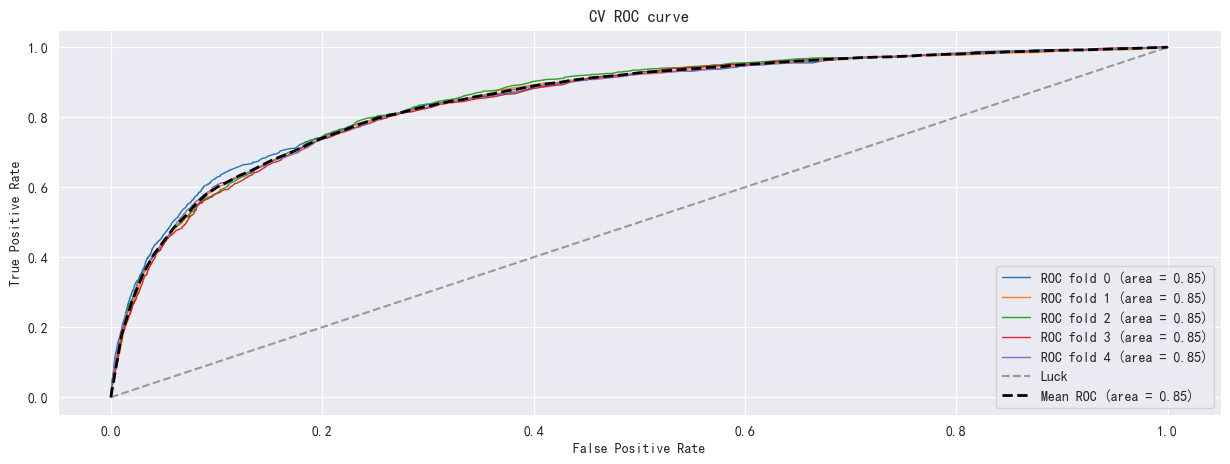

In [188]:
data = pd.read_csv('cs-Woetrain.csv')
#应变量
data_Y = data['SeriousDlqin2yrs']
#自变量，剔除对因变量影响不明显的变量
data_X = data.drop(['SeriousDlqin2yrs','DebtRatio','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
plotCvRocCurve(data_X, data_Y, lrMod.fit(data_X, data_Y))

In [189]:
plotCvRocCurve(X, Y, gridSearchAda.best_estimator_)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [190]:
rocZeroOne(Y_test, gridSearchAda.predict_proba(X_test))

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# lrMod.coef_ 

LR模型


ROC曲线最佳点位置: TPR = 78.100%, FPR = 23.716%

最佳截止点: 0.4605


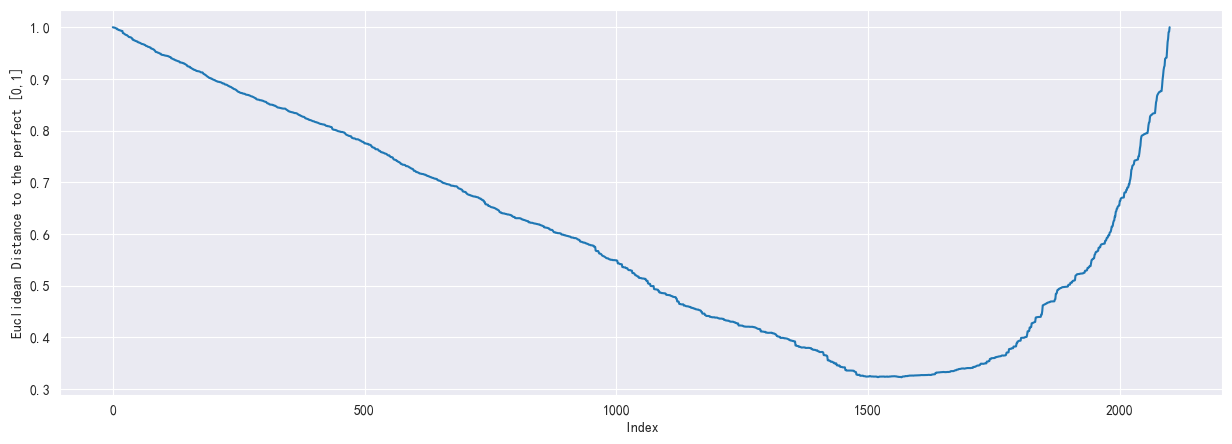

In [191]:
Y_test = test['SeriousDlqin2yrs']
X_test = test.drop(['SeriousDlqin2yrs', 'DebtRatio', 'NumberRealEstateLoansOrLines', 'NumberOfDependents'], axis=1)
rocZeroOne(Y_test, lrMod.predict_proba(X_test))

In [192]:
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
# 导入数据
data = pd.read_csv('cs-Woetrain.csv')
#应变量
Y = data['SeriousDlqin2yrs']
#自变量，剔除对因变量影响不明显的变量
X = data.drop(['SeriousDlqin2yrs','DebtRatio','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
# X = data.drop(['SeriousDlqin2yrs','DebtRatio','MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents'],axis=1)
X1 = sm.add_constant(X)
logit = sm.Logit(Y, X1)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.188722
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               101893
Model:                          Logit   Df Residuals:                   101885
Method:                           MLE   Df Model:                            7
Date:                Wed, 11 Sep 2024   Pseudo R-squ.:                  0.2409
Time:                        00:33:36   Log-Likelihood:                -19229.
converged:                       True   LL-Null:                       -25333.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -9.2342      0.1

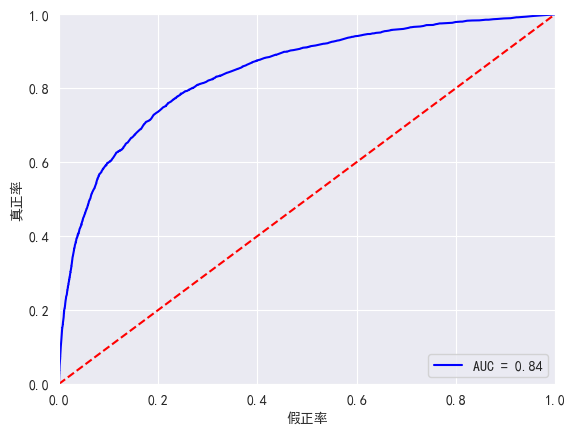

In [193]:
test = pd.read_csv('cs-TestWoeData.csv')
Y_test = test['SeriousDlqin2yrs']
# X_test = test.drop(['SeriousDlqin2yrs', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines', 'NumberOfDependents'], axis=1)
X_test = test.drop(['SeriousDlqin2yrs', 'DebtRatio', 'NumberRealEstateLoansOrLines', 'NumberOfDependents'], axis=1)
X3 = sm.add_constant(X_test)
resu = result.predict(X3)
fpr, tpr, threshold = roc_curve(Y_test, resu)
rocauc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % rocauc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('真正率')
plt.xlabel('假正率')
plt.show()

In [194]:
lrMod.coef_ 

array([[0.66628341, 0.50840406, 1.28592836, 0.27188033, 0.58388608,
        1.94338412, 1.41812161]])

In [195]:
import math
# coe为逻辑回归模型的系数
coe = [-9.2342, 0.6295, 0.4615, 1.1004, 0.3725, 0.5254, 1.5906, 1.1133]

p = 20 / math.log(2)
q = 600 - 20 * math.log(20) / math.log(2)
baseScore = round(q + p * coe[0], 0)

In [3]:
baseScore

247.0

In [197]:
def get_score(coe, woe, factor):
    scores = []
    for w in woe:
        score = round(coe * w * factor, 0)
        scores.append(score)
    return scores

In [198]:
x1 = get_score(coe[1], woex1, p)
x2 = get_score(coe[2], woex2, p)
x3 = get_score(coe[3], woex3, p)
x5 = get_score(coe[4], woex5, p)
x6 = get_score(coe[5], woex6, p)
x7 = get_score(coe[6], woex7, p)
x9 = get_score(coe[7], woex9, p)

In [199]:
print(x1, x2, x3, x5, x6, x7, x9)

[-25.0, -22.0, -5.0, 20.0] [8.0, 5.0, 4.0, 3.0, 1.0, -2.0, -6.0, -12.0, -14.0] [-16.0, 29.0, 55.0, 75.0, 83.0] [2.0, 1.0, -4.0] [17.0, 5.0, 2.0, -0.0, -2.0] [-17.0, 88.0, 122.0, 151.0] [-9.0, 58.0, 87.0, 100.0]


In [200]:
def compute_score(series, cut, score):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(cut) - 2
        m = len(cut) - 2
        while j >= 0:
            if value >= cut[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list

In [201]:
test1 = pd.read_csv('cs-TestData.csv')
test1['BaseScore'] = Series(np.zeros(len(test1))) + baseScore
test1['x1'] = Series(compute_score(test1['RevolvingUtilizationOfUnsecuredLines'], cutx1, x1))
test1['x2'] = Series(compute_score(test1['age'], cutx2, x2))
test1['x3'] = Series(compute_score(test1['NumberOfTime30-59DaysPastDueNotWorse'], cutx3, x3))
test1['x5'] = Series(compute_score(test1['MonthlyIncome'], cutx5, x5))
test1['x6'] = Series(compute_score(test1['NumberOfOpenCreditLinesAndLoans'], cutx6, x6))
test1['x7'] = Series(compute_score(test1['NumberOfTimes90DaysLate'], cutx7, x7))
test1['x9'] = Series(compute_score(test1['NumberOfTime60-89DaysPastDueNotWorse'], cutx9, x9))
test1['Score'] = test1['x1'] + test1['x2'] + test1['x3'] + test1['x7'] +test1['x9']  + baseScore
test1.to_csv('cs-ScoreData.csv', index=False)

In [202]:
ScoreData = pd.read_csv("cs-test.csv")
ScoreData.drop(["Unnamed: 0"], axis=1, inplace=True)
ScoreData.SeriousDlqin2yrs = -1

In [203]:
ScoreData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      101503 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

<Axes: >

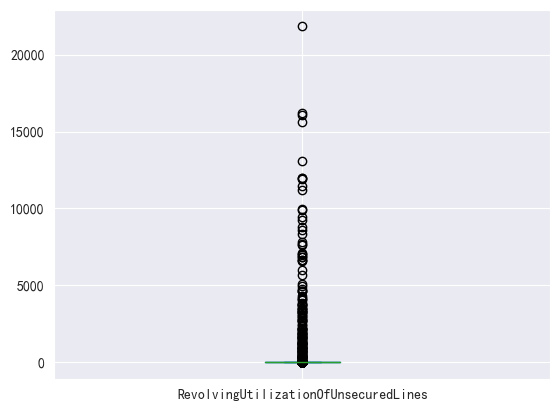

In [204]:
ScoreData["RevolvingUtilizationOfUnsecuredLines"].plot(kind="box", grid=True)

<Axes: >

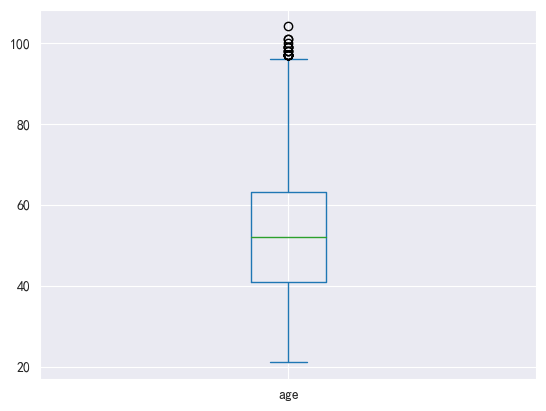

In [205]:
ScoreData.age.plot.box(grid=True)

<Axes: >

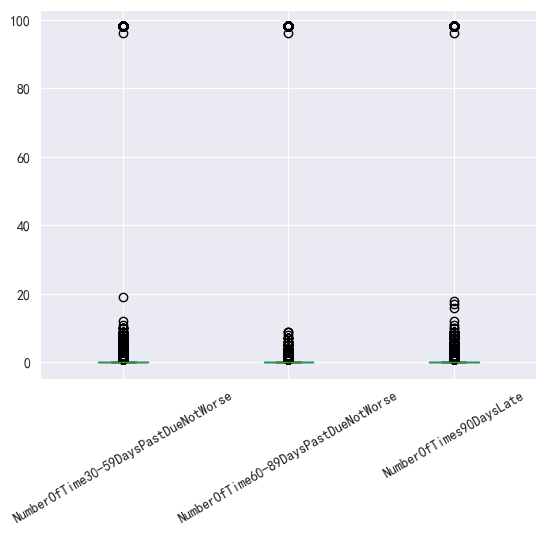

In [206]:
ScoreData.boxplot(column=["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"], 
            rot=30)

<Axes: >

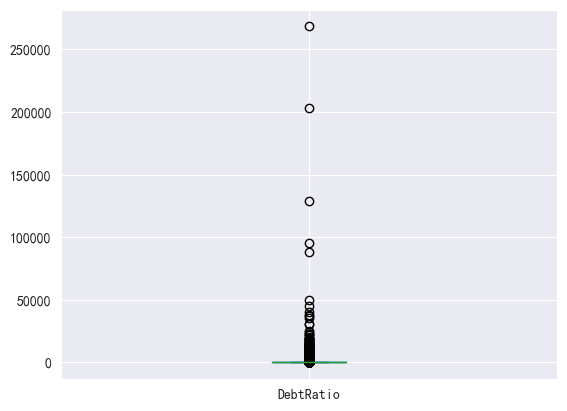

In [207]:
ScoreData["DebtRatio"].plot(kind="box")

<Axes: >

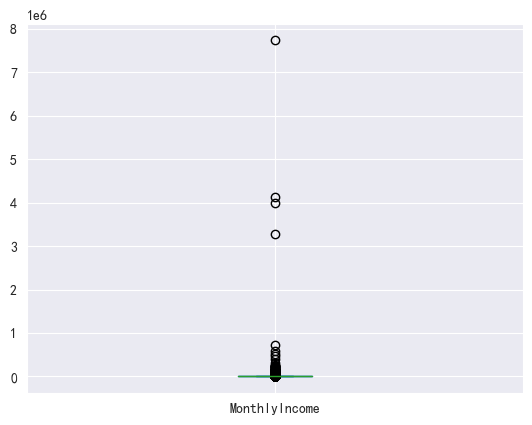

In [208]:
ScoreData.MonthlyIncome.plot.box(grid=True)

<Axes: >

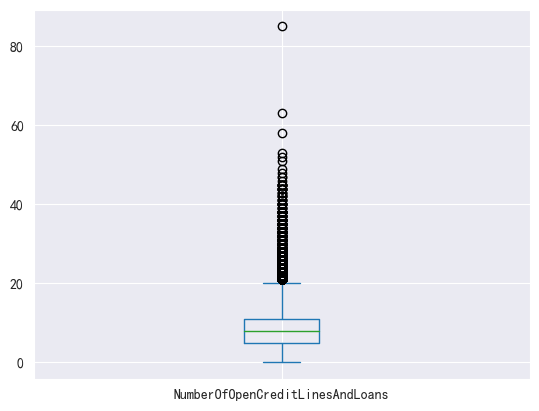

In [209]:
ScoreData["NumberOfOpenCreditLinesAndLoans"].plot(kind="box")

<Axes: >

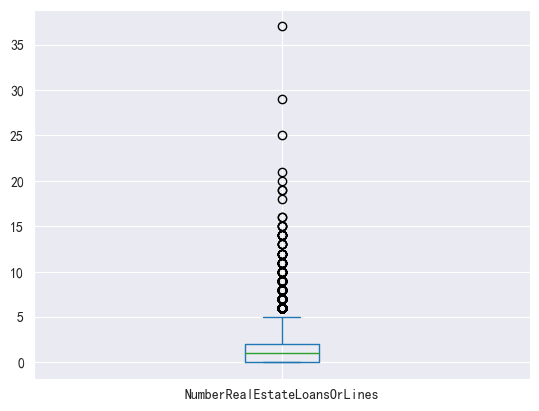

In [210]:
ScoreData["NumberRealEstateLoansOrLines"].plot(kind="box")

<Axes: >

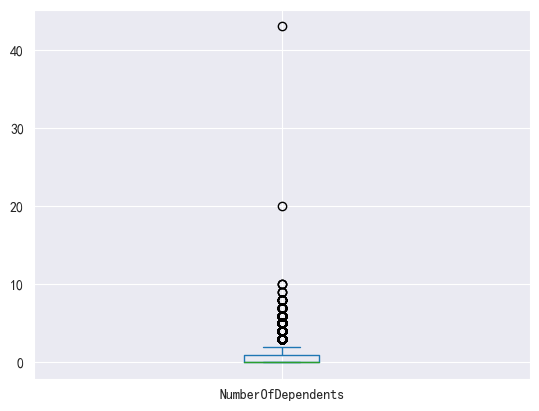

In [211]:
ScoreData.NumberOfDependents.plot.box(grid=True)

In [212]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 用随机森林对缺失值预测填充函数
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 用随机森林对缺失值进行预测填充的函数
def _set_missing(df: pd.DataFrame):  
    # 需要填充的列名
    cols_to_fill = ['MonthlyIncome', 'NumberOfDependents']
    
    # 循环遍历每个需要填充的列
    for col in cols_to_fill:
        # 保留数值型特征，去除第0列并且当前填充的列不作为特征
        feature_cols = [col for col in df.columns if col != 'MonthlyIncome' and col != 'NumberOfDependents']
        process_df = df.loc[:, feature_cols + [col]]
        
        # 分成已知该特征和未知该特征两部分
        known = process_df[process_df[col].notnull()].values
        unknown = process_df[process_df[col].isnull()].values
        
        if len(unknown) == 0:
            continue  # 如果没有缺失值就跳过
        # X为特征属性值，去掉要填充的那一列
        X = known[:, :-1]
        # y为结果标签值，即要填充的列
        y = known[:, -1]
        
        # fit到RandomForestRegressor之中
        rfr = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=3, n_jobs=-1)
        rfr.fit(X, y)
        
        # 用得到的模型进行未知特征值预测
        predicted = rfr.predict(unknown[:, :-1]).round(0)
        print(f"预测值（{col}）：", predicted)
        
        # 用得到的预测结果填补原缺失数据
        df.loc[df[col].isnull(), col] = predicted
    
    return df



In [213]:
ScoreData[ScoreData.SeriousDlqin2yrs == 0].head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


In [214]:
# 数据处理
ScoreData = _set_missing(ScoreData) # 使用随机森林处理缺失值
# 使用2来代替大于2的值
revNew = []
for val in ScoreData.RevolvingUtilizationOfUnsecuredLines:
    if val <= 2:
        revNew.append(val)
    else:
        revNew.append(2.)
ScoreData.RevolvingUtilizationOfUnsecuredLines = revNew

ScoreData["NumberOfTime30-59DaysPastDueNotWorse"] = replaceOutlier(ScoreData["NumberOfTime30-59DaysPastDueNotWorse"])
ScoreData["NumberOfTime60-89DaysPastDueNotWorse"] = replaceOutlier(ScoreData["NumberOfTime60-89DaysPastDueNotWorse"])
ScoreData["NumberOfTimes90DaysLate"] = replaceOutlier(ScoreData["NumberOfTimes90DaysLate"])


minUpperBound = min([val for (val, out) in zip(ScoreData.DebtRatio, mad_based_outlier(ScoreData.DebtRatio.values)) if out == True])
newDebtRatio = []
for val in ScoreData.DebtRatio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)
ScoreData.DebtRatio = newDebtRatio


minUpperBound_MonthlyIncome = min(
    [val for (val, out) in zip(ScoreData.MonthlyIncome, mad_based_outlier(ScoreData.MonthlyIncome.values)) if out == True])
newMonthlyIncome = []
for val in ScoreData.MonthlyIncome:
    if val > minUpperBound_MonthlyIncome:
        newMonthlyIncome.append(minUpperBound_MonthlyIncome)
    else:
        newMonthlyIncome.append(val)
ScoreData.MonthlyIncome = newMonthlyIncome

minUpperBound_NumberOfOpenCreditLinesAndLoans = min([val for (val, out) in zip(df.NumberOfOpenCreditLinesAndLoans,
                                                                               mad_based_outlier(
                                                                                   df.NumberOfOpenCreditLinesAndLoans.values))                                                if out == True])


newNumberOfOpenCreditLinesAndLoans = []
for val in ScoreData.NumberOfOpenCreditLinesAndLoans:
    if val > minUpperBound_NumberOfOpenCreditLinesAndLoans:
        newNumberOfOpenCreditLinesAndLoans.append(minUpperBound_NumberOfOpenCreditLinesAndLoans)
    else:
        newNumberOfOpenCreditLinesAndLoans.append(val)

ScoreData.NumberOfOpenCreditLinesAndLoans = newNumberOfOpenCreditLinesAndLoans


realNew = []
for val in ScoreData.NumberRealEstateLoansOrLines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)

ScoreData.NumberRealEstateLoansOrLines = realNew


depNew = []
for var in ScoreData.NumberOfDependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)

ScoreData.NumberOfDependents = depNew




预测值（MonthlyIncome）： [3256. 1780. 8351. ... 1780. 1780. 8351.]
预测值（NumberOfDependents）： [0. 1. 1. ... 0. 0. 0.]


In [215]:

# 确保新数据的特征与模型训练时保持一致
X_new = ScoreData.drop(['SeriousDlqin2yrs'], axis=1)
X_new.info()
# X_new = sm.add_constant(X_new)  # 如果需要常数列

# 3. 使用模型进行预测
# 使用最优的模型，假设是 bestGbModFitted 或 bestAdaModFitted
# 获取概率预测 (如果需要 AUC、ROC 曲线，可以使用概率预测)
predictions_proba = bestGbModFitted.predict_proba(X_new)

# 如果你只需要分类预测
predictions = bestGbModFitted.predict(X_new)

# 4. 保存预测结果
# 将预测结果添加到原数据中
ScoreData['Predicted_Probability'] = predictions_proba[:, 1]  # 假设我们只需要正类的概率
ScoreData['SeriousDlqin2yrs'] = predictions  # 分类预测结果

# 保存结果到 CSV
ScoreData.to_csv('predicted_results.csv', index=False)

print("预测已完成，并保存到 'predicted_results.csv'")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 1   age                                   101503 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  float64
 3   DebtRatio                             101503 non-null  float64
 4   MonthlyIncome                         101503 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 6   NumberOfTimes90DaysLate               101503 non-null  float64
 7   NumberRealEstateLoansOrLines          101503 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  float64
 9   NumberOfDependents                    101503 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 7.7 MB
预测已完成，并保存到 'predicted_r

In [217]:
import pickle

# 获取当前工作空间中的所有变量
variables = {}
skipped = []  # 存储被跳过的变量名
for name, value in globals().items():
    if not name.startswith('__') and not callable(value):
        try:
            pickle.dumps(value)  # 测试是否可以序列化
            variables[name] = value
        except (pickle.PicklingError, TypeError):
            skipped.append(name)

# 输出被跳过的变量
if skipped:
    print("以下变量无法序列化并已被跳过：", skipped)

# 将其余变量保存到文件中
with open('workspace.pkl', 'wb') as f:
    pickle.dump(variables, f)


以下变量无法序列化并已被跳过： ['np', 'pd', 'plt', 'sns', 'sys', '_pydevd_bundle', 'pydev_jupyter_vars', 'stats', 'pickle', 'sm', 'math']


In [2]:
import pickle

# 从文件中读取变量
with open('workspace.pkl', 'rb') as f:
    loaded_variables = pickle.load(f)

# 将读取的变量加载到当前的工作空间中
globals().update(loaded_variables)

# 输出恢复的变量
for name in loaded_variables:
    print(f"已加载变量: {name}")


已加载变量: _ih
已加载变量: _oh
已加载变量: _dh
已加载变量: In
已加载变量: Out
已加载变量: _
已加载变量: _i
已加载变量: _ii
已加载变量: _iii
已加载变量: _i1
已加载变量: _i2
已加载变量: _2
已加载变量: _i3
已加载变量: df
已加载变量: _i4
已加载变量: _4
已加载变量: _i5
已加载变量: _i6
已加载变量: _6
已加载变量: _i7
已加载变量: process_df
已加载变量: _i8
已加载变量: _8
已加载变量: _i9
已加载变量: _i10
已加载变量: _i11
已加载变量: _i12
已加载变量: _i13
已加载变量: _13
已加载变量: _i14
已加载变量: revNew
已加载变量: val
已加载变量: _i15
已加载变量: _15
已加载变量: _i16
已加载变量: _16
已加载变量: _i17
已加载变量: _i18
已加载变量: _18
已加载变量: _i19
已加载变量: _19
已加载变量: _i20
已加载变量: _i21
已加载变量: _i22
已加载变量: _i23
已加载变量: _23
已加载变量: _i24
已加载变量: _i25
已加载变量: debt_ratios
已加载变量: outliers
已加载变量: minUpperBound
已加载变量: _i26
已加载变量: _26
已加载变量: _i27
已加载变量: newDebtRatio
已加载变量: _i28
已加载变量: _28
已加载变量: _i29
已加载变量: _29
已加载变量: _i30
已加载变量: _30
已加载变量: _i31
已加载变量: _31
已加载变量: _i32
已加载变量: minUpperBound_MonthlyIncome
已加载变量: _i33
已加载变量: newMonthlyIncome
已加载变量: _i34
已加载变量: _34
已加载变量: _i35
已加载变量: _35
已加载变量: _i36
已加载变量: minUpperBound_NumberOfOpenCreditLinesAndLoans
已加载变量: _i37
已加载变量: newNumberOfOpenCreditLinesAndLoans
已加载